# <span style="color:royalblue;"> Glass Classification </span>

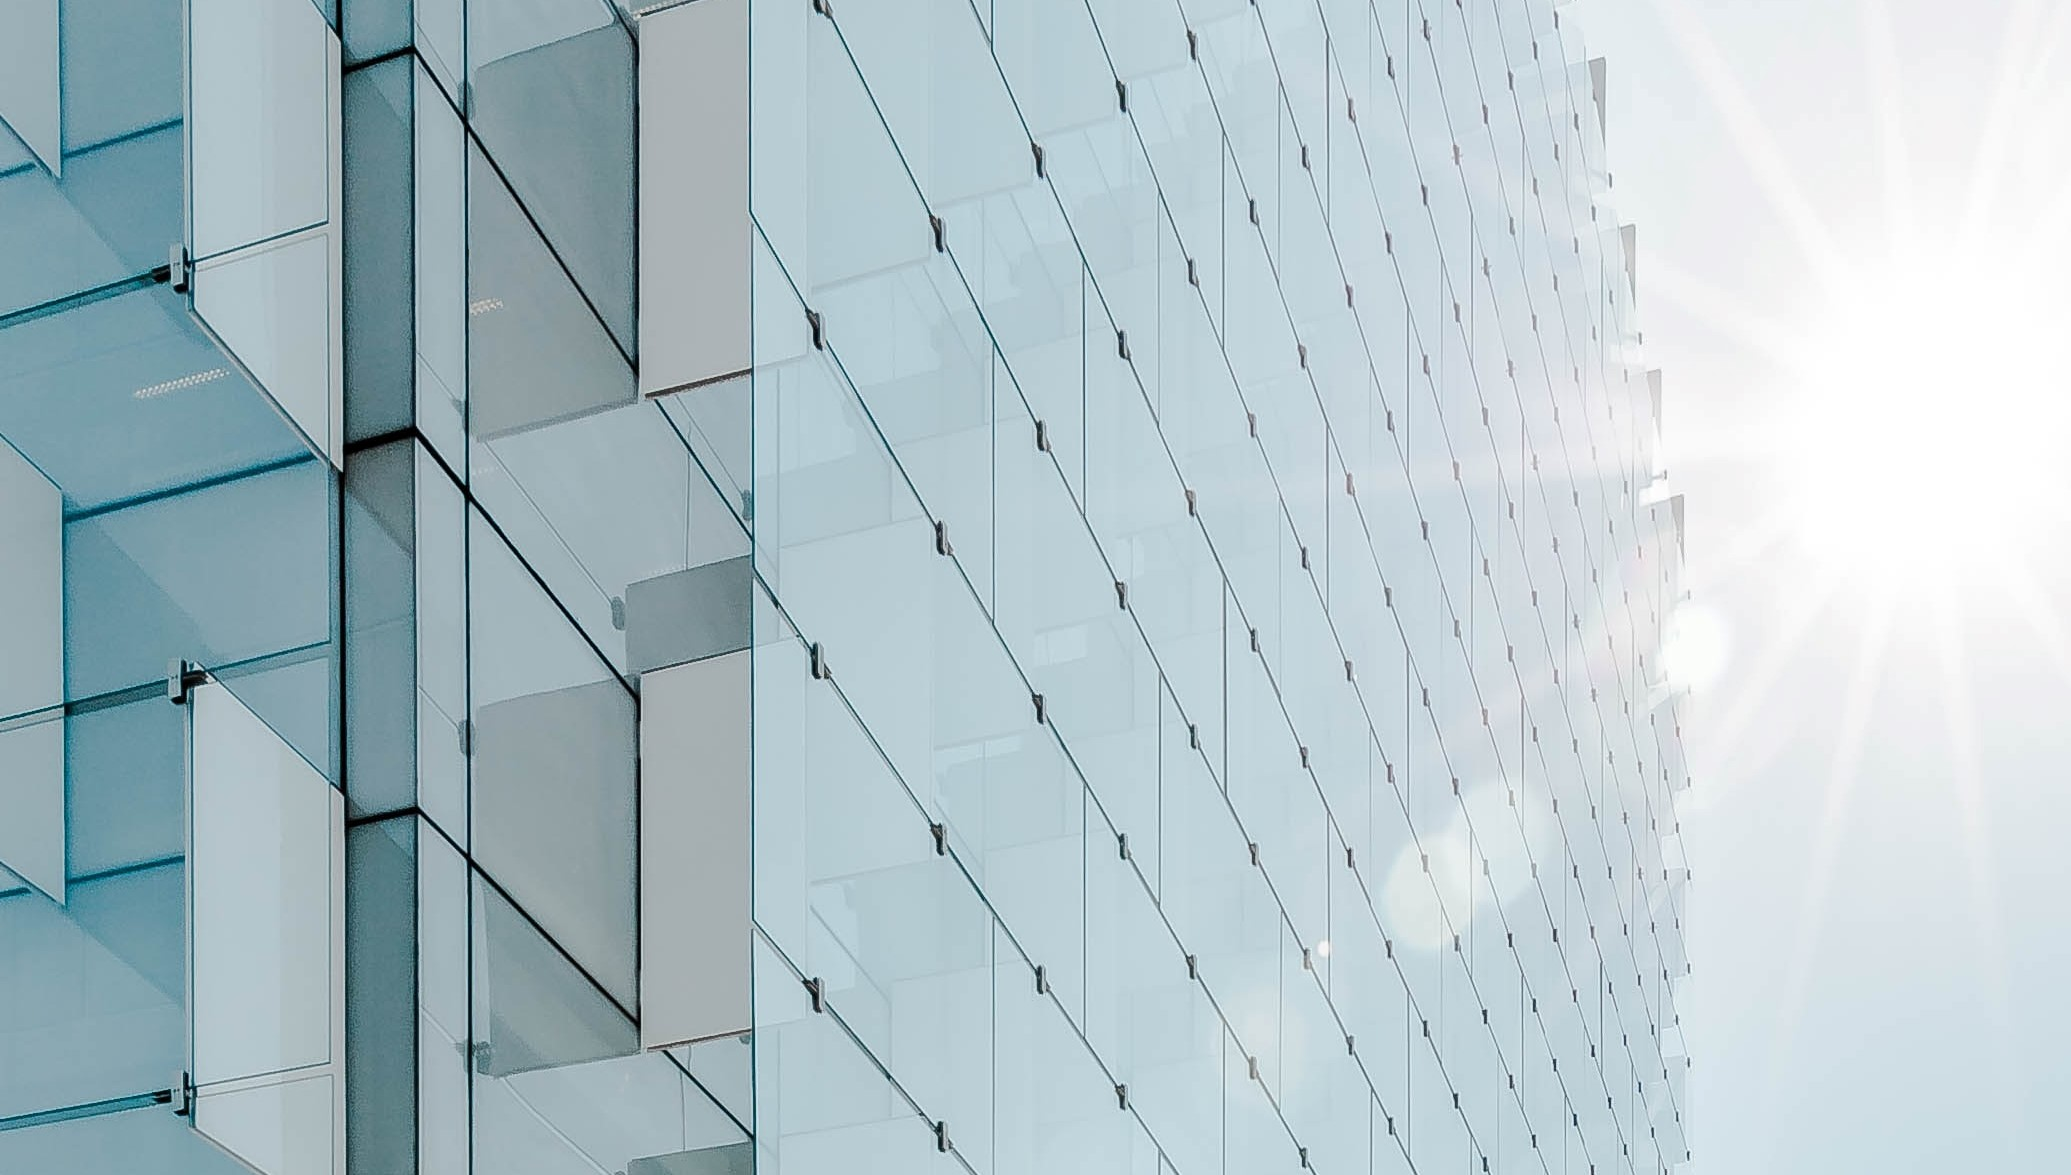

#### If you like my work, It will be really great of you to upvote this notebook!
#### If not then you leaving a comment on what do I need to work on and improve will be really helpful!

## <span style="color:royalblue;"> Importing Libraries </span>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## <span style="color:royalblue;"> Loading up the data </span>

In [ ]:
df = pd.read_csv("../input/glass/glass.csv")
df.head()

* **RI**: Refractive index

* **Na**: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

* **Mg**: Magnesium

* **Al**: Aluminum

* **Si**: Silicon

* **K**: Potassium

* **Ca**: Calcium

* **Ba**: Barium

* **Fe**: Iron

* **Type of glass**: (class attribute)
 1. Building Windows float processed 
 2. Building Windows non-float processed 
 3. Vehicle Windows float processed
 4. Vehicle Windows non-float processed 
 5. Containers
 6. Tableware
 7. Headlamps

In [ ]:
# Looking for missing values in the dataset
df.isna().sum()

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False);

In [ ]:
df["Type"].value_counts()

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10,8))

plt.pie(x=df["Type"].value_counts(), 
        labels=["Type 2", "Type 1", "Type 7", "Type 3", "Type 5", "Type 6"],
        shadow = True, 
        autopct="%1.2f%%", 
        )
plt.title("Glass Types Distribution Pie Chart",fontsize=15)
plt.show()

In [ ]:
plt.style.use("seaborn")
fig, ax =plt.subplots(figsize=(8,6)) 

sns.countplot(x = df["Type"]);
plt.title("Glass Types Distribution",fontsize=15, y=1.03);

In [ ]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,20)) 


sns.histplot(x = df["RI"], kde=True, ax=ax[0], color="steelblue");
ax[0].set_xlabel("RI",fontsize=15);

sns.histplot(x = df["Na"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("Na",fontsize=15);

sns.histplot(x = df["Mg"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("Mg",fontsize=15);

In [ ]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,20)) 


sns.histplot(x = df["Al"], kde=True, ax=ax[0], color="steelblue");
ax[0].set_xlabel("Al",fontsize=15);

sns.histplot(x = df["Si"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("Si",fontsize=15);

sns.histplot(x = df["K"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("K",fontsize=15);

In [ ]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,20)) 


sns.histplot(x = df["Ca"], kde=True, ax=ax[0], color="steelblue");
ax[0].set_xlabel("Ca",fontsize=15);

sns.histplot(x = df["Ba"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("Ba",fontsize=15);

sns.histplot(x = df["Fe"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("Fe",fontsize=15);

In [ ]:
plt.style.use("seaborn")
fig, ax =plt.subplots(4,1, figsize=(15,25)) 

sns.scatterplot(x = df['Na'], y = df['RI'], hue = df['Type'], palette='viridis', legend=True, ax=ax[0])
ax[0].set_xlabel("Sodium (Na)",fontsize=15);

sns.scatterplot(x = df['Mg'], y = df['RI'], hue = df['Type'], palette='spring_r', legend=True, ax=ax[1])
ax[1].set_xlabel("Magnesium (Mg)",fontsize=15);

sns.scatterplot(x = df['Al'], y = df['RI'], hue = df['Type'], palette='flare_r', legend=True, ax=ax[2]);
ax[2].set_xlabel("Aluminum (Al)",fontsize=15);

sns.scatterplot(x = df['Fe'], y = df['RI'], hue = df['Type'], palette='nipy_spectral_r', legend=True, ax=ax[3]);
ax[3].set_xlabel("Iron (Fe)",fontsize=15);

In [ ]:
plt.style.use("seaborn")
fig, ax =plt.subplots(4,1, figsize=(15,25)) 

sns.scatterplot(x = df['Si'], y = df['RI'], hue = df['Type'], palette='viridis', legend=True, ax=ax[0])
ax[0].set_xlabel("Silicon (Si)",fontsize=15);

sns.scatterplot(x = df['K'], y = df['RI'], hue = df['Type'], palette='spring_r', legend=True, ax=ax[1])
ax[1].set_xlabel("Potassium (K)",fontsize=15);

sns.scatterplot(x = df['Ca'], y = df['RI'], hue = df['Type'], palette='flare_r', legend=True, ax=ax[2]);
ax[2].set_xlabel("Calcium (Ca)",fontsize=15);

sns.scatterplot(x = df['Ba'], y = df['RI'], hue = df['Type'], palette='dark', legend=True, ax=ax[3]);
ax[3].set_xlabel("Barium (Ba)",fontsize=15);

## <span style="color:royalblue;"> Splitting the data into training and test datasets </span>
Here, we are trying to predict the glass type using the given data. Hence, the `Type` will be the y label and rest of the data will be the X or the input data.

In [ ]:
# X data
X = df.drop("Type", axis=1)
X.head()

In [ ]:
# y data
y = df["Type"]
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
len(X_train), len(X_test)

## <span style="color:royalblue;"> Linear Regression </span>

In [ ]:
from sklearn.linear_model import LinearRegression
np.random.seed(42)
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
LinearRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

## <span style="color:royalblue;"> Random Forest Classifier </span>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

In [ ]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

## <span style="color:royalblue;"> K Neighbors Classifier </span>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)

In [ ]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

## <span style="color:royalblue;"> CatBoost Classifier </span>

In [ ]:
from catboost import CatBoostClassifier
np.random.seed(42)
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);

In [ ]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

## <span style="color:royalblue;"> Gradient Boosting Classifier </span>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

In [ ]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

In [ ]:
x = ["K Neighbors Classifier",
     "Random Forest Classifier",
     "Linear Regression",
     "CatBoost Classifier", 
     "Gradient Boosting Classifier"]

y = [KNeighborsClassifierScore,
     RandomForestClassifierScore,
     LinearRegressionScore,
     CatBoostClassifierScore, 
     GradientBoostingClassifierScore]

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=15, y=1.03);